In [1]:
import pandas as pd
import chart_studio
chart_studio.tools.set_credentials_file(username='username', api_key='api_key')
import chart_studio.plotly as py
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import *

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

In [2]:
#파일 불러오기
file_path = '../Data_set/Churn_final.xlsx'
data = pd.read_excel(file_path)

In [3]:
data.head()

,Customer ID,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,8779-QRDMV,78,0,NaN,2,1,1,2,Month-to-Month,1,39.65,59.65,1
1,7495-OOKFY,74,1,Offer E,5,1,0,1,Month-to-Month,8,80.65,1024.10,1
2,1658-BYGOY,71,3,Offer D,3,0,2,1,Month-to-Month,18,95.45,1910.88,1
3,4598-XLKNJ,78,1,Offer C,3,2,2,1,Month-to-Month,25,98.50,2995.07,1
4,4846-WHAFZ,80,1,Offer C,1,0,0,1,Month-to-Month,37,76.50,3102.36,1


In [4]:
#범주형 문자화
data['Satisfaction Score'] = data['Satisfaction Score'].astype(str)

#더미 변수화
d_data = pd.get_dummies(data)

d_data.head()

,Age,Number of Dependents,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Churn Value,Customer ID_0002-ORFBO,...,Membership_Offer D,Membership_Offer E,Satisfaction Score_1,Satisfaction Score_2,Satisfaction Score_3,Satisfaction Score_4,Satisfaction Score_5,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
0,78,0,1,1,2,1,39.65,59.65,1,False,...,False,False,False,True,False,False,False,True,False,False
1,74,1,1,0,1,8,80.65,1024.10,1,False,...,False,True,False,False,False,False,True,True,False,False
2,71,3,0,2,1,18,95.45,1910.88,1,False,...,True,False,False,False,True,False,False,True,False,False
3,78,1,2,2,1,25,98.50,2995.07,1,False,...,False,False,False,False,True,False,False,True,False,False
4,80,1,0,0,1,37,76.50,3102.36,1,False,...,False,False,True,False,False,False,False,True,False,False


In [5]:
# Churn Value 열을 타겟 변수로 설정. 종속 변수와 독립 변수 분리
y = d_data['Churn Value'].values
X = d_data.drop(columns=['Churn Value'])


In [6]:
# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)



In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Standard 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#MinMax 스케일링
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#로버스트
#scaler = RobustScaler().fit(X_train)
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)



In [8]:
# SMOTE 오버샘플링
over = SMOTE(sampling_strategy='auto', random_state=88)
X_train_resampled, y_train_resampled = over.fit_resample(X_train_scaled, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_resampled.shape, y_train_resampled.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_resampled).value_counts())


SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4930, 7064) (4930,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7220, 7064) (7220,)
SMOTE 적용 후 레이블 값 분포: 
 0    3610
1    3610
Name: count, dtype: int64


In [9]:
print(X_train_scaled)
print(X_train_scaled[0])

[[-0.09701734 -0.49140846  0.58668418 ... -1.02547655  1.88807172
  -0.60562926]
 [ 0.85576256 -0.49140846 -0.97506151 ...  0.97515638 -0.5296409
  -0.60562926]
 [-1.22844348 -0.49140846  0.58668418 ... -1.02547655 -0.5296409
   1.65117517]
 ...
 [ 0.43892135 -0.49140846  1.36755703 ...  0.97515638 -0.5296409
  -0.60562926]
 [-0.57340729 -0.49140846  0.58668418 ... -1.02547655 -0.5296409
   1.65117517]
 [ 0.55801884  2.58691899 -0.97506151 ...  0.97515638 -0.5296409
  -0.60562926]]
[-0.09701734 -0.49140846  0.58668418 ... -1.02547655  1.88807172
 -0.60562926]


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


# 로지스틱 회귀 모델 튜닝
lr_model = LogisticRegression(random_state=88, max_iter=1000)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# 최적 하이퍼파라미터 출력
print("로지스틱 회귀 모델 최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델로 재학습
best_lr_model = grid_search.best_estimator_
best_lr_model.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터로 성능 평가
y_pred_lr = best_lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

y_prob_lr = best_lr_model.predict_proba(X_test_scaled)
roc_auc = roc_auc_score(y_test, y_prob_lr[:, 1])

print("로지스틱 회귀 모델 정확도:", accuracy_lr)
print("로지스틱 회귀 모델 혼동 행렬:\n", confusion_lr)
print("로지스틱 회귀 모델 분류 보고서:\n", report_lr)
print("ROC-AUC:", roc_auc)


로지스틱 회귀 모델 최적 하이퍼파라미터: {'C': 100, 'penalty': 'l2'}
로지스틱 회귀 모델 정확도: 0.8135352579271179
로지스틱 회귀 모델 혼동 행렬:
 [[1493   71]
 [ 323  226]]
로지스틱 회귀 모델 분류 보고서:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      1564
           1       0.76      0.41      0.53       549

    accuracy                           0.81      2113
   macro avg       0.79      0.68      0.71      2113
weighted avg       0.81      0.81      0.79      2113

ROC-AUC: 0.881148705621474


In [11]:
from sklearn.metrics import accuracy_score, classification_report

sensitivity = confusion_lr[1, 1] / (confusion_lr[1, 0] + confusion_lr[1, 1])
specificity = confusion_lr[0, 0] / (confusion_lr[0, 0] + confusion_lr[0, 1])
precision = confusion_lr[1, 1] / (confusion_lr[0, 1] + confusion_lr[1, 1])
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
print("민감도 (Sensitivity):", sensitivity)
print("특이도 (Specificity):", specificity)
print("정밀도 (Precision):", precision)
print("F1 Score:", f1_score)

민감도 (Sensitivity): 0.4116575591985428
특이도 (Specificity): 0.9546035805626598
정밀도 (Precision): 0.7609427609427609
F1 Score: 0.5342789598108747


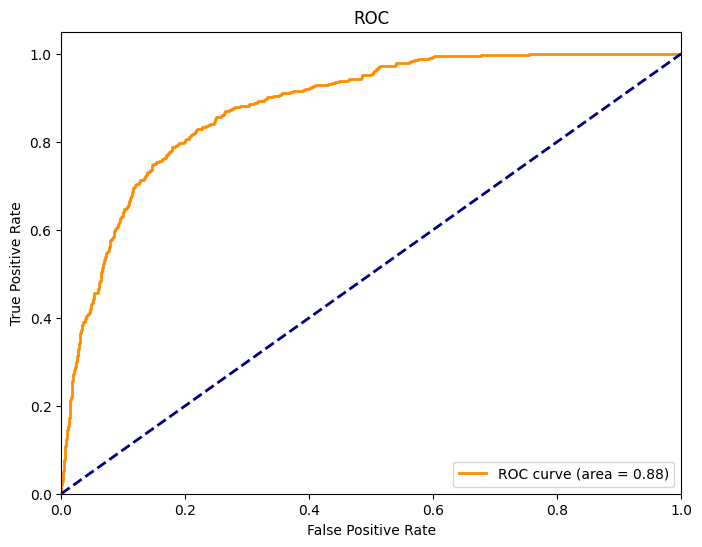

In [12]:
# ROC 곡선 그리기
y_score_lr = best_lr_model.decision_function(X_test_scaled)  # 로지스틱 회귀의 결정 함수 값
fpr, tpr, _ = roc_curve(y_test, y_score_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

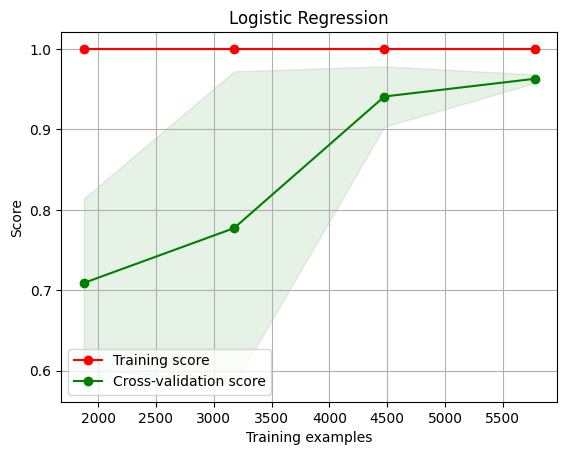

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 모델과 데이터를 사용하여 학습 곡선 그리기
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 학습 곡선 그리기
plot_learning_curve(best_lr_model,'Logistic Regression' , X_train_resampled, y_train_resampled, cv=5, n_jobs=4)

plt.show()

In [14]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 로지스틱 회귀 모델 튜닝
lr_model = LogisticRegression(random_state=88, max_iter=1000)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)


# 교차 검증을 통해 모델의 일반화 성능을 평가합니다.
cv_scores = cross_val_score(best_lr_model, X_train_resampled, y_train_resampled, cv=5)  # 5-폴드 교차 검증
print("교차 검증 정확도 평균:", np.mean(cv_scores))

# 최적 모델로 재학습
best_lr_model = grid_search.best_estimator_
best_lr_model.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터로 모델을 평가합니다.
y_pred = best_lr_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("테스트 데이터 정확도:", test_accuracy)


교차 검증 정확도 평균: 0.9628808864265928
테스트 데이터 정확도: 0.8135352579271179


In [15]:
# report for model evaluation
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, precision_recall_curve

def model_report(model):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    # AUC - ROC curve
    y_score = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    model_roc_auc = roc_auc_score(y_test, y_pred)
    model_f1_score_macro = precision_recall_fscore_support(y_test, y_pred, average="macro")[2]
    model_f1_score_weighted = precision_recall_fscore_support(y_test, y_pred, average="weighted")[2]
    model_sensitivity = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1)[0]
    model_specificity = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=0)[0]
    model_precision = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1)[1]
    model_recall = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1)[2]

    # Calculating f2 score
    beta = 2 #1.5
    model_f2_score = (1 + beta**2) * (model_precision * model_recall) / ((beta**2 * model_precision) + model_recall)

    print("Confusion Matrix\n", cm, "\n")
    print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))
    print("Accuracy Score      : ", accuracy_score(y_test, y_pred).round(4))
    print("Area Under Curve    : ", model_roc_auc.round(4))
    print("F1 Score (macro)    : ", model_f1_score_macro.round(4))
    print("F1 Score (weighted) : ", model_f1_score_weighted.round(4))
    print("F2 Score            : ", model_f2_score.round(4))
    print("Sensitivity         : ", model_sensitivity.round(4))
    print("Specificity         : ", model_specificity.round(4))
    print("Precision           : ", model_precision.round(4))
    print("Recall              : ", model_recall.round(4), "\n")

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Confusion Matrix
 [[1493   71]
 [ 323  226]] 

              precision    recall  f1-score   support

    No Churn       0.82      0.95      0.88      1564
       Churn       0.76      0.41      0.53       549

    accuracy                           0.81      2113
   macro avg       0.79      0.68      0.71      2113
weighted avg       0.81      0.81      0.79      2113

Accuracy Score      :  0.8135
Area Under Curve    :  0.6831
F1 Score (macro)    :  0.7089
F1 Score (weighted) :  0.7927
F2 Score            :  0.5042
Sensitivity         :  0.7609
Specificity         :  0.8221
Precision           :  0.4117
Recall              :  0.5343 



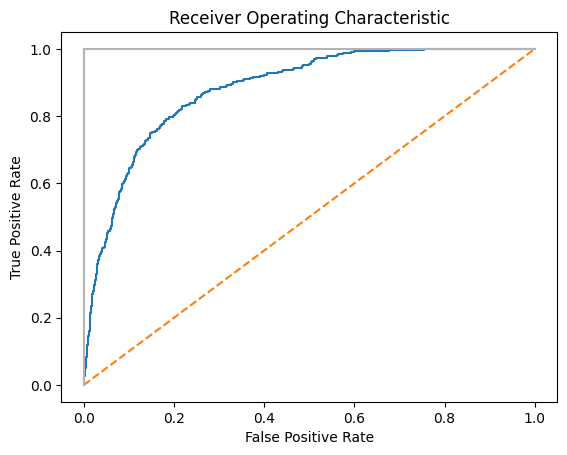

In [16]:
model_report(best_lr_model)